# Unsupervised Learning
---
## 개요

### Supervised Learning vs Unsupervised Learning

지금까지 우리는 주로 supervised learning (지도학습) 방법들을 살펴보았다.

Supervised learning에서는 입력 변수(feature) $X$와 이에 대응하는 반응 변수(response) $Y$가 주어지며,
$X$를 이용하여 $Y$를 예측하는 것이 주된 목표이다.

Unsupervised learning (비지도 학습)은 데이터에 레이블($Y$값)이 존재하지 않는 상황에서,
데이터 내부에 숨어 있는 구조나 패턴을 학습하는 머신러닝 방법이다.

* Unsupervised learning에서는 오직 feature 변수 $X$만 관찰 가능하며, 명시적인 반응 변수 $Y$는 존재하지 않는다.
* 따라서 예측(prediction) 자체보다는 데이터의 구조 이해, 시각화, 하위 그룹(subgroup)의 발견에 더 큰 관심을 둔다.


### 주요 활용 목적

Unsupervised learning의 주요 목적은 다음과 같다.

* 고차원 데이터의 **효과적인 시각화**
* 데이터의 **잠재적인 구조 요약**
* 유사한 관측치들 간의 **군집(clustering)** 발견


### 본 강의에서 다룰 주요 방법

본 절에서는 다음의 두 가지 대표적인 unsupervised learning 방법을 살펴본다.

* PCA (Principal Component Analysis)
  * 고차원 데이터를 저차원으로 요약
  * 데이터 시각화 및 supervised learning을 위한 전처리(preprocessing)에 활용

* Clustering
  * 관측치들을 유사성에 따라 여러 개의 subgroup으로 분할
  * 데이터 내의 잠재적 구조를 탐색하는 데 사용재적 구조를 탐색하는 데 사용


## Principal component analysis (PCA)

PCA(주성분 분석)는 대표적인 차원 축소 기법 중 하나로, 고차원 데이터를 정보 손실을 최소화하면서 저차원 공간에 효율적으로 표현하는 방법이다.

* PCA는 데이터의 분산이 최대가 되도록 하면서, 서로 상관관계가 없는 (uncorrelated) 변수들의 선형 결합을 찾아낸다.   
* 주로 지도학습(Supervised Learning)을 위한 전처리 단계로 사용되거나, 데이터 시각화를 목적으로 활용된다.

### First principal component (첫 번째 주성분)

주어진 feature 변수들 $X_1, \cdots, X_p$에 대해, 첫 번째 주성분 (first principal component)은 다음과 같은 정규화된 선형 결합 (normalized linear combination) 중에서

$$ Z_1 = \phi_{11} X_1 + \phi_{21} X_2 + \cdots + \phi_{p1} X_p $$

가장 큰 분산을 가지는 조합을 의미한다. 보다 엄밀하게는, 다음 최적화 문제의 해로 정의된다.

$$
\max_{\phi_1}
\mathrm{Var}(\phi_1^\top X)
\quad
\text{subject to }
|\phi_1|^2 = \sum_{j=1}^{p} \phi_{j1}^2
$$

여기서 정규화(normalization)는 $\sum \phi^2_{ji} = 1$을 뜻함.

- $\phi_{11}, \cdots, \phi_{p1}$을 첫 번째 주성분의 로딩(loading) 이라고 부르며, 

- $\phi_1 = (\phi_{11}, \cdots, \phi_{p1})^{\top}$를 loading vector라고 한다.

- 각 로딩 값은 해당 원래 변수 $X_j$가 주성분 $Z_1$을 구성하는 데 얼마나 기여하는지를 나타낸다.

### First principal component score  (첫 번째 주성분 점수)

$n$개의 데이터 포인트 $x_1, x_2, \cdots, x_n$들이 주어졌다고 하자. 여기서,

$$ x_i = (x_{i1}, x_{i2}, \cdots, x_{ip})^{\top} $$

각 관찰값을 첫 번째 loading vector 방향으로 정사영(projetion)하면, 다음의 principal component score (주성분 점수)를 얻는다.

$$ z_{11} = \phi_{11} x_{11} + \phi_{21} x_{12} + \cdots + \phi_{p1} x_{1p} $$
$$ z_{21} = \phi_{11} x_{21} + \phi_{21} x_{22} + \cdots + \phi_{p1} x_{2p} $$
$$ \vdots $$
$$ z_{n1} = \phi_{11} x_{n1} + \phi_{21} x_{n2} + \cdots + \phi_{p1} x_{np} $$

- $z_{i1}$은 $i$번째 관측값이 first principal component 방향으로 정사영된 값
- 즉, 고차원 공간에 있던 관측값 $x_i$를 첫 번째 주성분 축 위의 **스칼라 좌표**로 표현한 것이다.

아래 그림은 pop과 ad 두 개의 feature variable이 있는 상황을 가정한다.

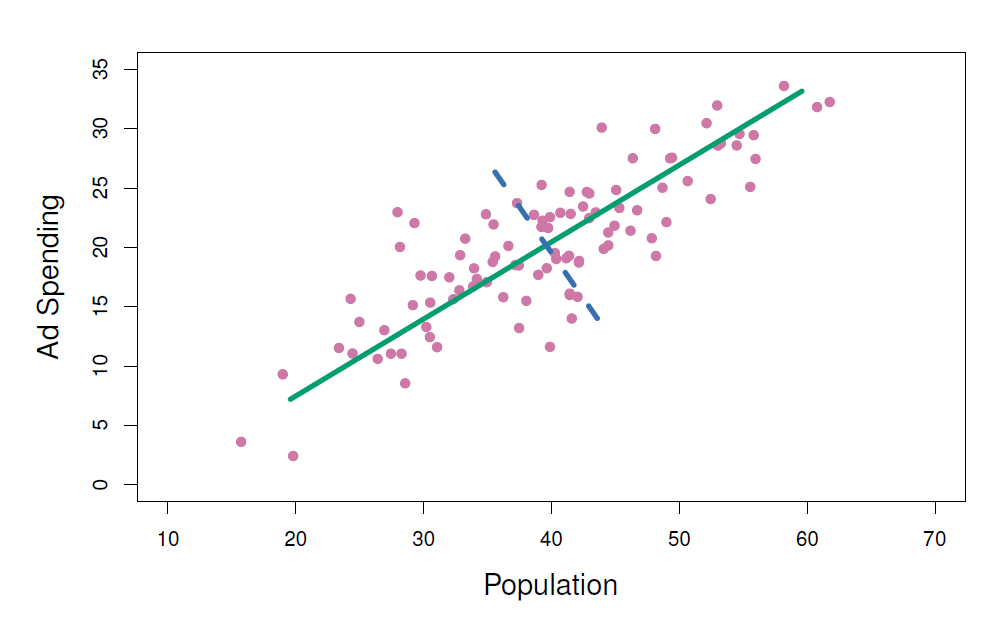

위 예제에서 첫 번째 principal component는 다음으로 나타난다.

$$ Z_1 = 0.839 \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) + 0.544 \times (\mathrm{ad} - \overline{\mathrm{ad}}) $$

- loading: $\phi_{11} = 0.839, \phi_{21} = 0.544$
- $\phi_{11}^2 + \phi_{21}^2 = 1$을 만족  

이는 첫 번째 주성분의 loading vector가
$$
\phi_1 = (0.839, 0.544)^\top
$$
임을 의미한다.

#### Mean Centering과 Standardization

위 식에서 볼 수 있듯이, PCA에서는 각 변수에서 평균을 빼는 **mean centering**이 필수적으로 수행된다.

* Mean centering을 하지 않으면, 주성분이 데이터의 **변동성**이 아니라 평균 위치의 영향을 받게 된다.
* PCA는 분산을 최대화하는 방향을 찾는 방법이므로, 데이터는 반드시 평균 0을 기준으로 정렬되어야 한다.

또한 변수들의 단위나 스케일이 크게 다른 경우에는 각 변수를 표준편차로 나누는 **표준화**(standardization)를 수행하는 것이 일반적이다.

따라서, 위에서 구한 첫 번째 주성분은 다음 분산을 최대화하는 선형 결합이다.

$$
\mathrm{Var}
\left(
\phi_{11} (\mathrm{pop} - \overline{\mathrm{pop}})
+
\phi_{21} (\mathrm{ad} - \overline{\mathrm{ad}})
\right)
$$

### Second principal component (두 번째 주성분)

첫 번째 주성분에 이어, 두 번째 주성분(Second Principal Component) 도 정의할 수 있다.

두 번째 주성분은 첫 번째 주성분 $Z_1$과는 상관관계가 없으면서, 다음과 같은 선형 결합의 분산을 최대화하도록 선택된다.

$$\mathrm{Var}\left(\phi_{12} \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) + \phi_{22} \times (\mathrm{ad} - \overline{\mathrm{ad}})\right)$$

이 예제에서는 다음과 같다.

$$ Z_2 = 0.544 \times ( \mathrm{pop} - \overline{\mathrm{pop}} ) - 0.839 \times (\mathrm{ad} - \overline{\mathrm{ad}}) $$

- loading: $\phi_{12} = 0.544, \phi_{22} = -0.839$
- $\phi_{12}^2 + \phi_{22}^2 = 1$  

두 번째 주성분은 첫 번째 주성분에서 설명되지 않은 방향의 정보를 추가적으로 제공하지만, 이 예제에서는 첫 번째 주성분만으로도 대부분의 데이터 정보를 잘 설명하고 있다.

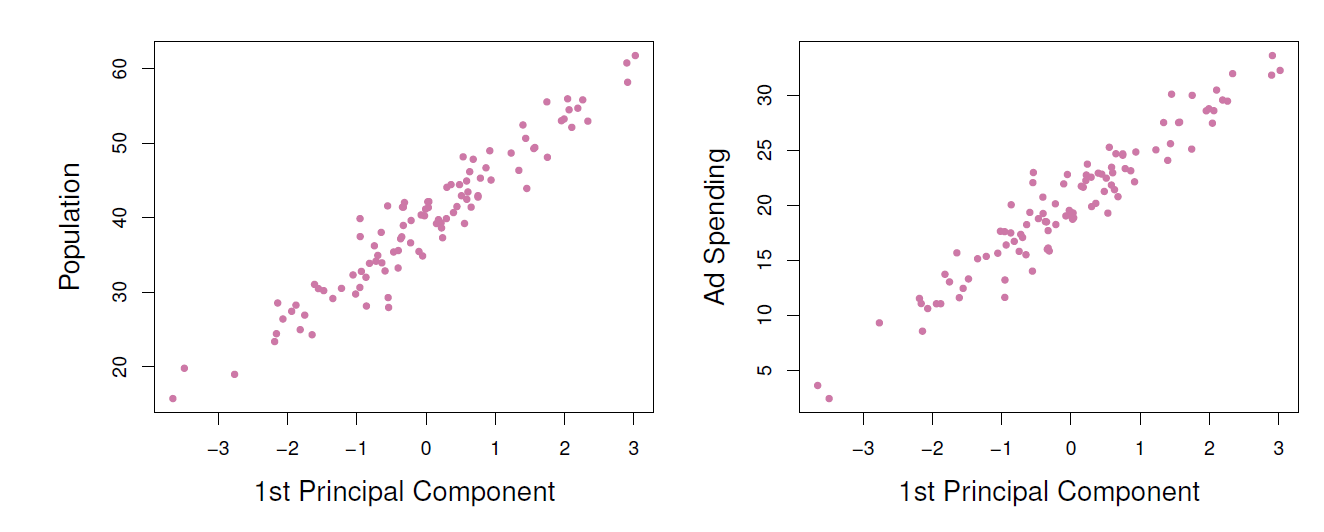

두 번째 컴포넌트에 담긴 정보는 매우 적은 것을 확인할 수 있다.

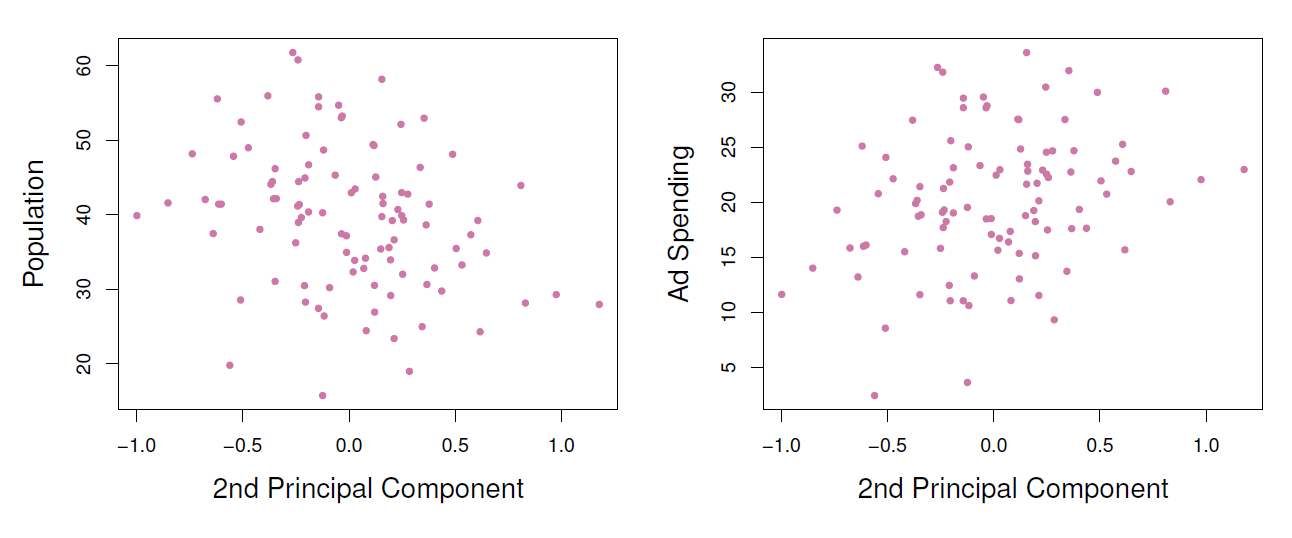

보다 자세히 표현하면 다음과 같다.

주어진 (표준화 된) feature 변수들 $X_1, \cdots, X_p$에 대해, 두 번째 주성분 (first principal component)은 다음과 같은 정규화된 선형 결합 (normalized linear combination) 중에서

$$ Z_2 = \phi_{12} X_1 + \phi_{22} X_2 + \cdots + \phi_{p2} X_p $$

분산이 최대가 되도록 선택된 조합이다.

단, $Z_2$는 $Z_1$과 상관관계가 없도록 한다.

- $\phi_{11}, \cdots, \phi_{p2}$을 두 번째 주성분의 로딩(loading) 이라고 부르며, 

- $\phi_2 = (\phi_{12}, \cdots, \phi_{p2})^{\top}$를 두 번째 주성분의 loading vector라고 한다.

- $Z_2$와 $Z_1$이 상관관계가 없게 하기 위해서, $\phi_1^{\top} \phi_2 = 0$.

각 관찰값을 두 번째 loading vector 방향으로 정사영(projetion)하면, 두 번째 주성분에 대한 principal component score (주성분 점수)를 얻는다.

$$ z_{12} = \phi_{12} x_{11} + \phi_{22} x_{12} + \cdots + \phi_{p2} x_{1p} $$
$$ z_{22} = \phi_{12} x_{21} + \phi_{22} x_{22} + \cdots + \phi_{p2} x_{2p} $$
$$ \vdots $$
$$ z_{n2} = \phi_{12} x_{n1} + \phi_{22} x_{n2} + \cdots + \phi_{p2} x_{np} $$

- $z_{i2}$은 $i$번째 관측값이 second principal component 방향으로 정사영된 값 

### Loading matrix

Loading 벡터들을 모아 matrix 형태로 표현할 수 있다.

$$
\boldsymbol{\Phi} =
\begin{bmatrix}
\phi_{11} & \phi_{12} & \cdots & \phi_{1M} \\
\phi_{21} & \phi_{22} & \cdots & \phi_{2M} \\
\vdots    & \vdots    & \ddots & \vdots    \\
\phi_{p1} & \phi_{p2} & \cdots & \phi_{pM}
\end{bmatrix}
$$

- $\phi_{ij}$ :  $i$-th feature variable의 $j$-th principal component에 대한 loading   
- $j$-th 열 벡터 : $j$-th principal component에 대한 loading vector  
- $i$-th 행 벡터 : $i$-th feature variable이 각 principal component에 얼마나 기여하는지 나타내는 정도

PCA에서 주성분 점수 행렬 $\mathbf{Z}$는 다음과 같이 표현된다.

$$ \mathbf{Z} = \mathbf{X} \boldsymbol{\Phi} $$

### Computation of principal component

$n \times p$ 크기의 데이터 행렬 $\mathbf{X}$가 있다고 하자.

또한 $\mathbf{X}$의 각 변수들은 평균이 0으로 중심화(centered) 되어 있다고 가정하자.

우리는 다음과 같은 형태의 선형 결합 중에서

$$ z_{i1} = \phi_{11} x_{i1} + \phi_{21} x_{i2} + \cdots + \phi_{pi} x_{ip} $$

표본 분산(sample variance) 이 가장 큰 조합 (first principal component) 을 찾고자 한다. 단 제약 조건은 $\sum_{j=1}^{p} \phi^2_{j1} = 1$.

이는 다음의 최적화 문제로 귀결된다.

$$ \underset{\phi_{11}, \cdots, \phi_{p1}}{\mathrm{maximize}} ~ \frac{1}{n} \sum_{i=1}^{n} \left( \sum_{j=1}^{p} \phi_{j1}x_{ij} \right)^2 \text{ subject to } \sum_{j=1}^{p} \phi_{j1}^2 = 1$$ 

위 문제는 선형대수에서 자주 사용되는 singular-value decomposition을 통해 해결할 수 있다.

첫 번째 주성분 $\phi_1$을 구한 이후에는, 두 번째 주성분 $\phi_2$ 를 다음 조건하에 찾는다.

- 분산이 최대화되도록 하면서,
- $\phi_2$는 $\phi_1$에 직교(orthogonal)

즉, $\phi_1^\top \phi_2 = 0$이라는 직교성 제약 조건을 추가한 새로운 최적화 문제를 풀게 된다.

이 과정을 반복하면, 서로 직교하는 주성분들을 순차적으로 구할 수 있다.

각 주성분은 이전 주성분들이 설명하지 못한 방향에서의 최대한의 분산을 설명한다.

### Example with USArrests dataset

USArrests dataset은 미국의 50개 주에 대해 인구 100,000명 당 Assault, Murder, Rape으로 체포되는 횟수 자료이다.

추가적으로 UrbanPop이라 하여 도시에 거주하는 비율을 기록하였다.

PCA loading에 대한 결과, $\boldsymbol{\Phi}$는 다음과 같다.

 | |  PC1  | PC2 |
 |-|------|---------|
 |Murder | 0.5358995 | -0.4181809 |
 |Assault | 0.5831836 | -0.1879856 |
 |UrbanPop | 0.2781909 | 0.8728062|
 |Rape | 0.5434321 | 0.1673186 |

다음의 biplot은 시각화된 자료를 보여준다.

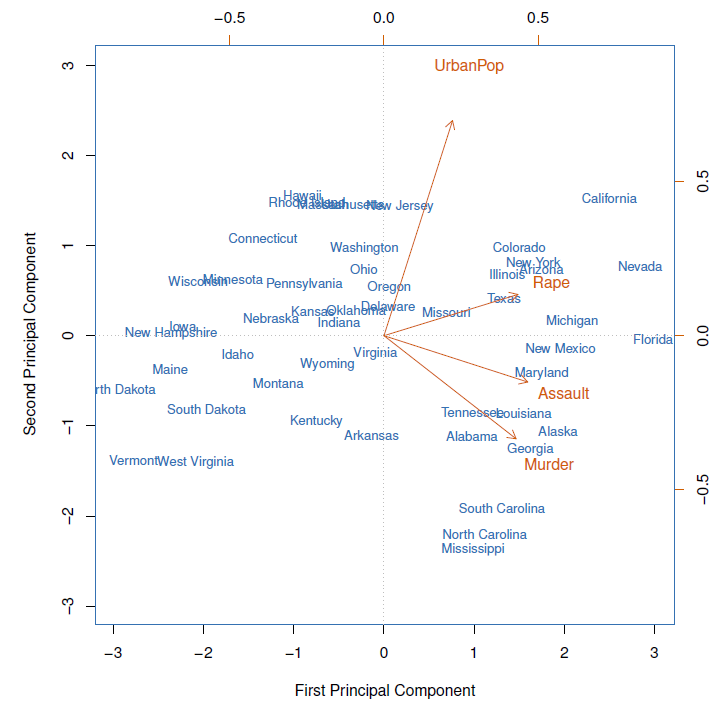

위 그래프를 해석하면 다음과 같다.

- 주황색 화살표: 각 feature 변수의 loading값을 나타냄 (PCA 축 방향)
  - $j$ 번째 feature 변수에 대해, $\phi_{j1}, \phi_{j2}$를 나타낸 것으로 각 principal component에 대한 기여 정도 <br><br>

- 예: Rape의 loading 값은  (주황색 tick을 읽는다)
  - First component(x-축): 0.54  
  - Second component(y-축): 0.17  <br><br>

- Rape과 Assault, Murder의 first component에 대한 loading 값들은 모두 비슷하다. 즉 이 세 가지 항목은 양의 상관관계를 지닌다.

- 반면 second loading vector의 대부분은 UrbanPop에 기인함을 볼 수 있으며, UrbanPop은 Rape, Assault, Murder 변수와는 적은 상관관계를 지닌다.

- 주(state) 이름의 위치: 각 주의 principal component score
  - 주를 나타내는 파란색 글씨들의 first component와 second component를 아래와 왼쪽 축을 기준으로 살펴볼 수 있다.

  - Califonia, Nevada, Floriad는 first component에 대해 높은 score를 가지고 있으며, 범죄율이 높다. 반면, North Dakoda는 낮은 범죄율을 보인다.

  - Califonia는 second component도 높은 score를 가지며 높은 도시화를 나타낸다. 반면 Mississipi는 도시화율이 낮다.

  - Indiana는 평균적인 범죄율과 도시화율을 보인다.

### Another Interpretation of Principal Components

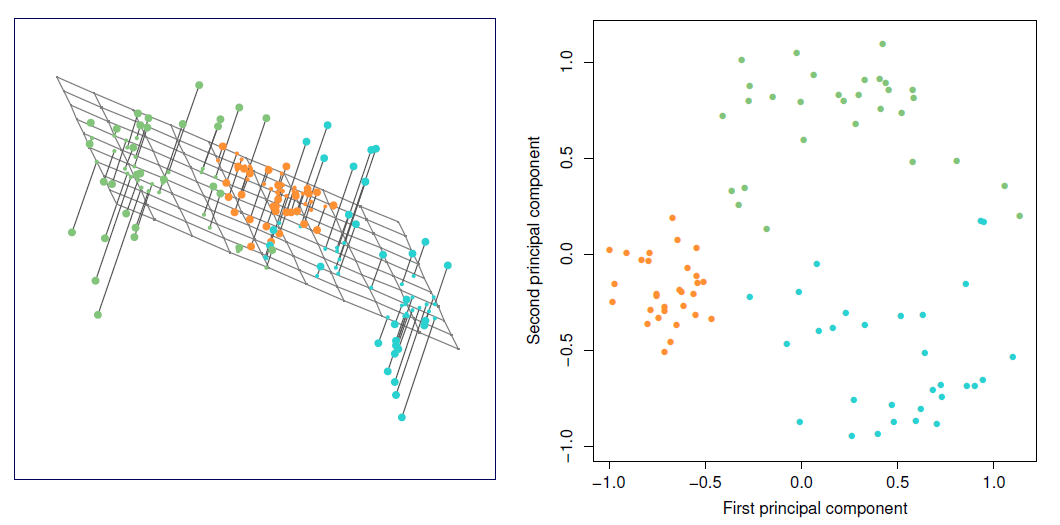

First principle component의 loading vector는 관찰값들에 대해 가장 가까운 $p$-dimensional space 상의 직선을 의미한다.

처음 두 개의 principle component의 loading vector는 관찰값들에 대해 가장 가까운 $p$-dimensional space 상의 평면을 의미한다.

처음 세 개의 principle component의 loading vector는 관찰값들에 대해 가장 가까운 $3$-dimensional hyperplane을 의미한다.

PCA를 통해 차원을 축소하면, 원래의 고차원 데이터 $\mathbf{X}$를 일부 주성분만 사용하여 근사적으로 복원할 수 있다.

$$ x_{ij} \approx \sum_{m=1}^{M} z_{im} \phi_{jm} $$

이것은 원래 변수 $x_{ij}$ ($i$번째 관측치의 $j$번째 변수 값) 을 $M$개의 주성분(PC1 ~ PCM) 으로부터 복원할 수 있다는 것을 뜻한다.

### Proportion Variance Explained

각 컴포넌트의 strength를 이해하기 위해, proportion of variance explained (PVE)를 살펴볼 필요가 있다.

데이터 집합의 total variance는 

$$ \sum_{j=1}^{p} \mathrm{Var} (X_j) = \sum_{j=1}^{p} \frac{1}{n} \sum_{i=1}^{n} x_{ij}^2 $$

로 정의되며, the variance explained by the $m$th principal component는

$$ \mathrm{Var} (Z_m) = \frac{1}{n} \sum_{i=1}^{n} z_{im}^2 $$

이다.

다음이 성립한다.

$$ \sum_{j=1}^{p} \mathrm{Var} (X_j) = \sum_{m=1}^{M} \mathrm{Var} (Z_m),  \quad M = \min (n-1, p) $$

따라서 PVE는 다음으로 정의된다.

$$ \frac{\sum_{i=1}^{n} z_{im}^2}{\sum_{j=1}^{p} \sum_{i=1}^{n} x_{ij}^2} $$

PCA는 cross-validation이 불가능하기 때문에, PVE 그림을 통해 적절한 component의 수를 찾는다.

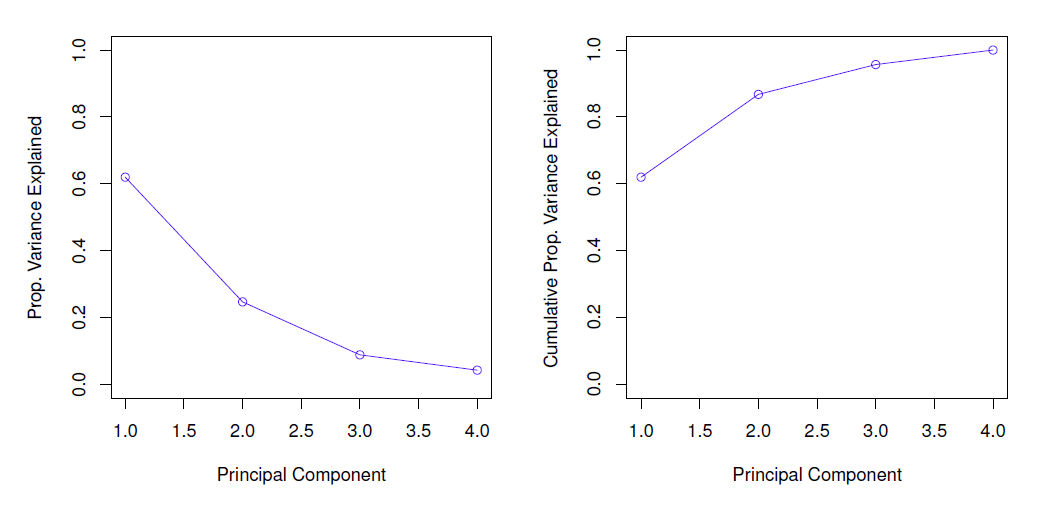

### sklearn에서의 PCA

[```sklearn.decomposition.PCA```](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
breast = load_breast_cancer()

In [2]:
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

In [3]:
breast_dataset= pd.DataFrame(np.concatenate([breast_data,labels],axis=1))

In [4]:
features = breast.feature_names

In [5]:
features_labels = np.append(features,'label')

In [6]:
breast_dataset.columns = features_labels

In [7]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

PCA에서 변수들의 스케일이 다를 경우 표준화를 하고 진행한다.

In [9]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
std_sclaer = StandardScaler()
x = std_sclaer.fit_transform(x) # normalizing the features

In [10]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [11]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['Principal Component 1', 'Principal Component 2'])

In [12]:
df = pd.concat([principal_breast_Df, breast_dataset['label']], axis = 1)
df

,Principal Component 1,Principal Component 2,label
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign
...,...,...,...
564,6.439315,-3.576817,Benign
565,3.793382,-3.584048,Benign
566,1.256179,-1.902297,Benign
567,10.374794,1.672010,Benign


In [13]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182]


`.components_`를 이용하면 loading vector들을 살펴볼 수 있다. 

- 위에서 살펴본 loading matrix $\boldsymbol{\Phi}$의 전치 형태로 해석할 수 있다.

In [14]:
# loading vectors
pca_breast.components_ 

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [15]:
# loading matrix
pd.DataFrame(
    pca_breast.components_.T,
    index=breast.feature_names,
    columns=["Principal Component 1", "Principal Component 2"]
)

,Principal Component 1,Principal Component 2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


첫 번째 데이터에 대해 첫 번째 PC에 대한 score와 두 번째 PC에 대한 score를 계산해 보자.

즉, 다음을 계산한 것이다.

- $ z_{11} = \phi_{11} x_{11} + \phi_{21} x_{12} + \cdots + \phi_{p1} x_{1p} $
- $ z_{12} = \phi_{12} x_{11} + \phi_{22} x_{12} + \cdots + \phi_{p2} x_{1p} $

In [16]:
# phi_1 * x_1, phi_2 * x_2
pca_breast.components_[0] @ x[0,:], pca_breast.components_[1] @ x[0,:]

(9.192836826213245, 1.9485830707781653)

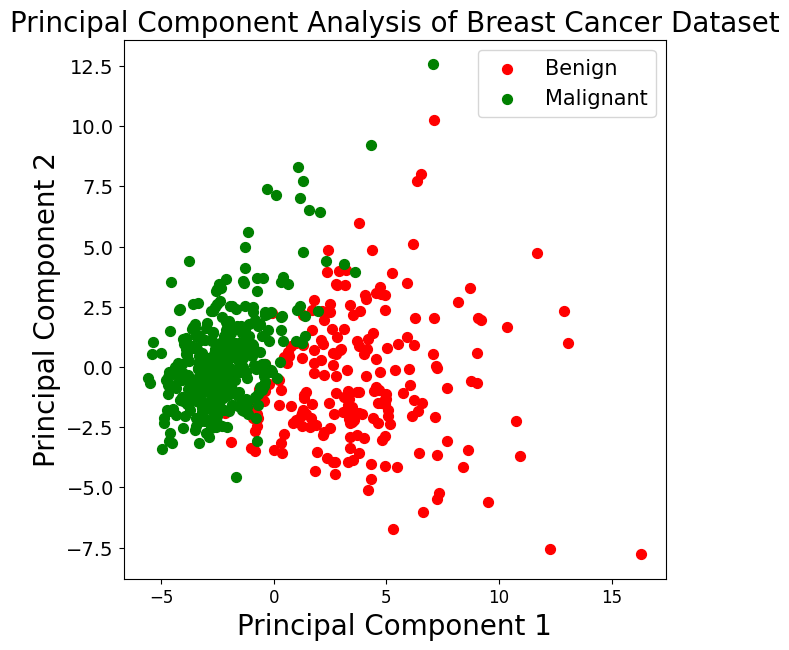

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'Principal Component 1'],
               principal_breast_Df.loc[indicesToKeep, 'Principal Component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

biplot 그리기

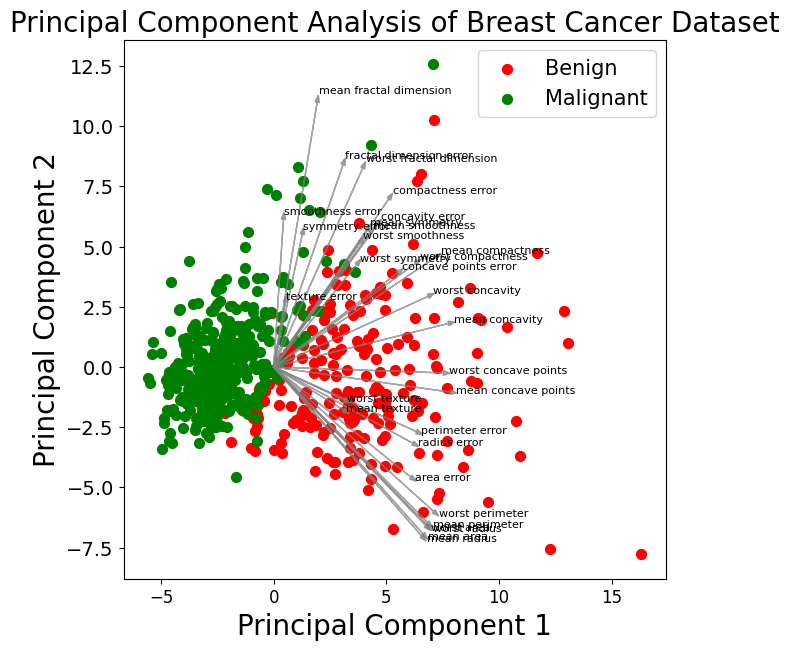

In [18]:
plt.figure(figsize=(7,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'Principal Component 1'],
               principal_breast_Df.loc[indicesToKeep, 'Principal Component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

loadings = pca_breast.components_.T  # shape: (features, 2)

scaler = 30
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0]*scaler, loadings[i, 1]*scaler,
              color='gray', alpha=0.7, head_width=0.2)
    plt.text(loadings[i, 0]*(scaler + 1), loadings[i, 1]*(scaler + 1),
             features[i], fontsize=8, color='black')

plt.show()


### LDA에 적용

In [19]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(principal_breast_Df, breast_dataset['label'])

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [21]:
lda.fit(X_tn, y_tn)

LinearDiscriminantAnalysis()

In [22]:
import numpy as np

xx1, xx2 = np.meshgrid(np.linspace(-6, 17, 1000),
                         np.linspace(-8, 13, 1000))

np.c_[xx1.ravel(), xx2.ravel()]
clss = lda.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

C:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [23]:
clss[clss=="Malignant"] = 1
clss[clss=="Benign"] = 0
clss = clss.astype(np.int64)

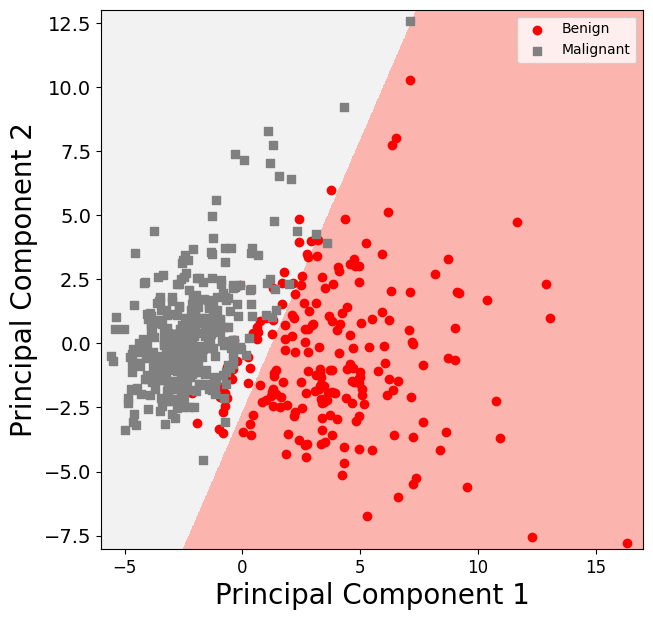

In [24]:
import matplotlib.pyplot as plt
#from matplotlib import colors

plt.figure(figsize=(7, 7))
plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

status = ['Benign', 'Malignant']
markers = ['o', 's']
colors = ["red", "grey"]



for st, mark, color in zip(status, markers, colors):
    X_i = df[df['label'] == st]
    plt.scatter(X_i[["Principal Component 1"]], X_i[["Principal Component 2"]], marker = mark, label = st, color = color)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
    
plt.legend()    
plt.show()

In [25]:
## example new data

x_new = [18.81, 18.15, 110.0, 1260.0, 0.09831, 0.1027, 0.1479, 0.09498,
       0.1582, 0.05395, 0.7282, 1.317, 5.865, 112.4, 0.006494, 0.01893,
       0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2128.0,
       0.0152, 0.315, 0.5972, 0.2388, 0.2768, 0.07615]
x_new = np.array(x_new).reshape(1, -1)

In [26]:
x_new_std = std_sclaer.transform(x_new)

In [27]:
x_new_std

array([[ 1.32995562, -0.26520386,  0.74269913,  1.72099748,  0.1387526 ,
        -0.03109908,  0.74200738,  1.18809286, -0.83832462, -1.25424076,
         1.16587569,  0.18170032,  1.48456748,  1.58550746, -0.1823337 ,
        -0.36597246,  0.06685396,  0.55376156, -0.84540629, -0.68005955,
         2.28842973,  0.8472399 ,  2.36912947,  2.19284997, -5.13618976,
         0.38635918,  1.5592504 ,  1.89104864, -0.21476962, -0.43201158]])

In [28]:
x_new_pca = pca_breast.transform(x_new_std)
x_new_pca

array([[ 3.78602683, -4.64957859]])

In [29]:
print(lda.predict(x_new_pca))

['Benign']


C:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


## Clustering

Clustering은 데이터 셋으로부터 비슷한 성질을 가지는 subgroup 혹은 cluster를 형성하는 테크닉이다.

PCA는 관찰값들의 분산을 설명할 수 있는 저차원 표현법을 찾는 과정이라면

Clustering은 성질이 비슷한 subgroup을 찾아가는 과정이다.

* K-means clustering : 관찰값들을 미리 지정한 숫자의 cluster로 분할하는 방법

* hierarchical clustering : cluster의 개수가 얼마가 될지 미리 알지 못하는 상태에서 dendrogram이라 불리우는 tree 형태의 시각화 결과를 얻게 된다. 

### K-mean clustering

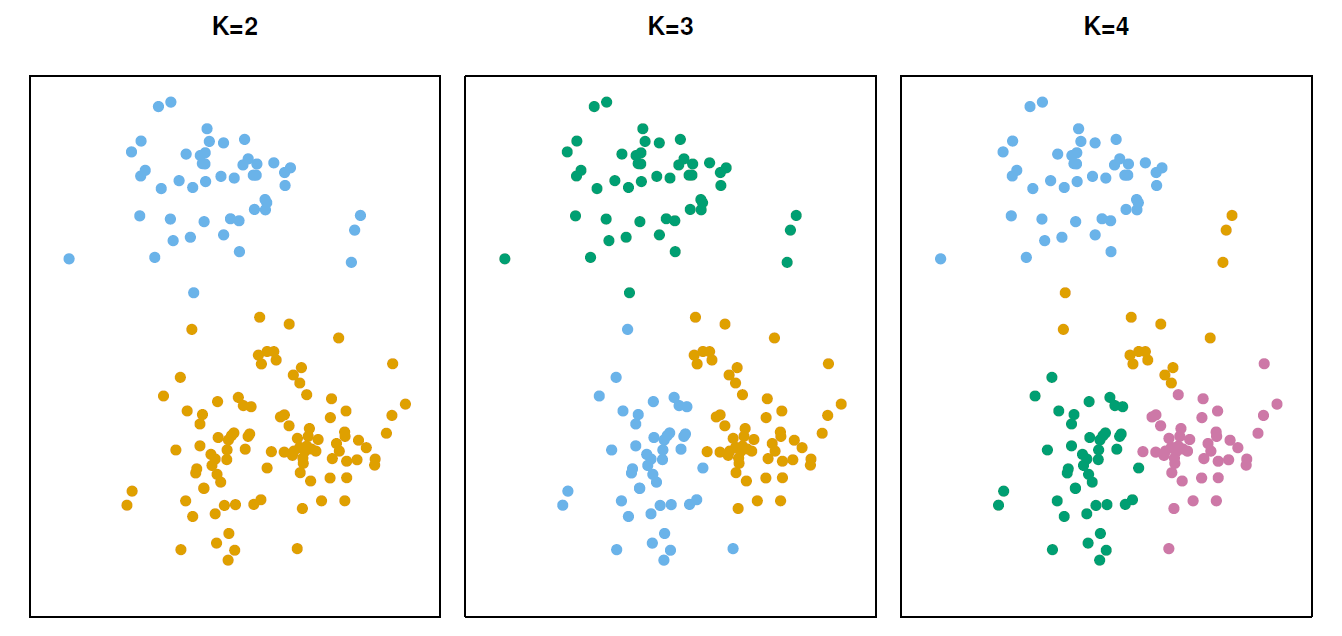


서로 다른 K 값에 대해 clustering의 결과를 보여준다.

Cluster에는 순서가 없으며 색은 임의로 배정되었다.

Cluster label은 clustering에 이용된 것이 아니라 clustering의 결과임을 주지하라.

$C_1, \cdots, C_K$를 각 클러스터 별 데이터 인덱스로 이루어진 집합이라고 하자. 그러면 이들은 다음을 만족한다.

* $C_1 \cup \cdots \cup C_K = \{1, \cdots, n \}$  
* $C_k \cap C_{k'} = \emptyset$ for all $k \neq k'$

좋은 clustering은 각 cluster 내에서의 변동이 될 수 있는 한 작은 clustering을 말한다.

$C_k$의 within-cluster variation을 측정하는 measure를 $\mathrm{WCV} (C_k)$라고 하자.

따라서 다음의 문제를 해결하고자 한다.

$$ \underset{C_1, \cdots, C_K}{\mathrm{minimize}} \left\{ \sum_{k=1}^{K} \mathrm{WCV} (C_k) \right\} $$

일반적으로 Euclidean distance가 WCV로 사용된다.

$$ \mathrm{WCV}(C_k) = \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^{p} (x_{ij} - x_{i'j})^2 $$

### K-means clustering algorithm

1. 각 관찰값에 1부터 K까지 랜덤하게 숫자를 부여한다.
2. 다음 과정을 멈출 때까지 반복한다.
   1. 각 K cluster에서 cluster별 centroid를 계산한다. 즉, $k$th cluster에서 feature 변수들의 평균을 계산한다.
   2. 각 observation에 가장 가까운 centroid에 해당하는 cluster 번호를 부여한다.

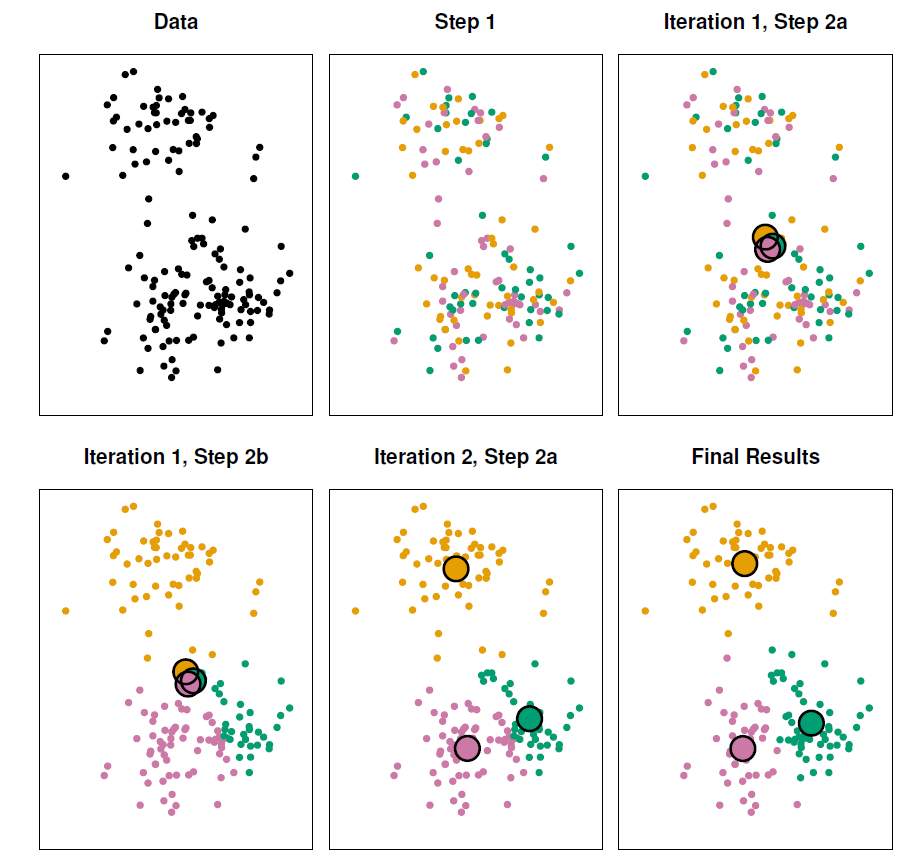

In [30]:
from sklearn.cluster import KMeans
import numpy as np


In [31]:
# 가상의 데이터
n = 200
mvec = np.random.choice([0, 0, 0.8], n, replace=True)
X1 = np.random.normal(mvec, 0.3, n)
mask = mvec == 0.8
X2 = np.random.normal(np.random.choice([-0.8, 0.8], n, replace = True), 0.3, n)
temp = np.random.normal(0, 0.3, n)
X2[mask] = temp[mask]

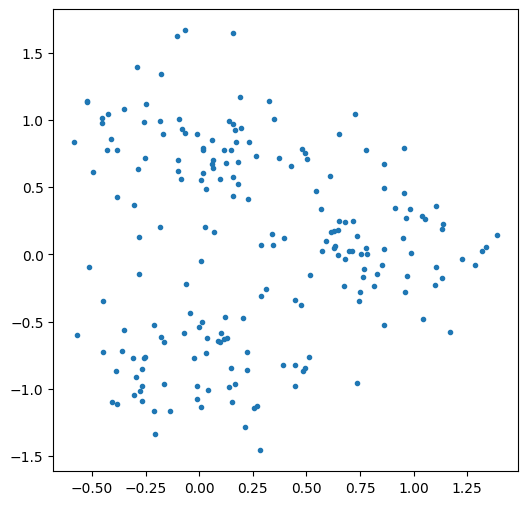

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(X1, X2, '.')
plt.show()

In [33]:
X = np.c_[X1, X2]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

C:\Users\Owner\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
kmeans.labels_

array([0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0,
       0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 1, 2,
       1, 1])

In [35]:
kmeans.predict([[-1, -1], [1, 1]])

array([0, 2])

In [36]:
kmeans.cluster_centers_

array([[-0.0200157 , -0.78967684],
       [-0.01308371,  0.81461842],
       [ 0.81290175,  0.06041831]])

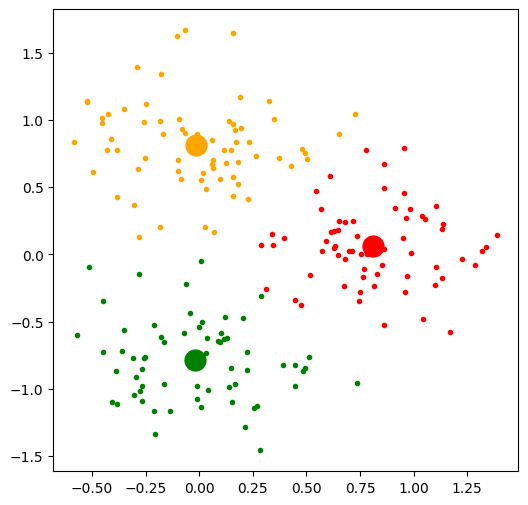

In [37]:
plt.figure(1, figsize=(6, 6))


plt.scatter(X[kmeans.labels_==0, 0], X[kmeans.labels_==0, 1], marker=".", color="green")
plt.scatter(X[kmeans.labels_==1, 0], X[kmeans.labels_==1, 1], marker=".", color="orange")
plt.scatter(X[kmeans.labels_==2, 0], X[kmeans.labels_==2, 1], marker=".", color="red")

plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], marker='o', color = "green", markersize=15)
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], marker='o', color = "orange", markersize=15)
plt.plot(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], marker='o', color = "red", markersize=15)
plt.show()

#### Hierarchical Clustering

Hierachical clustering은 bottom-up 방식으로 K-clustering과 달리 미리 정한 숫자 $K$가 필요하지 않다.

Hierarchical Clustering의 알고리즘은 다음과 같다.

1. 각 관찰값을 하나의 cluster로 본다.
2. 가장 가까운 두 cluster를 파악하고 이 둘을 합친다.
3. 반복한다.
4. 모든 포인트가 하나의 cluster로 합쳐지면 멈춘다.

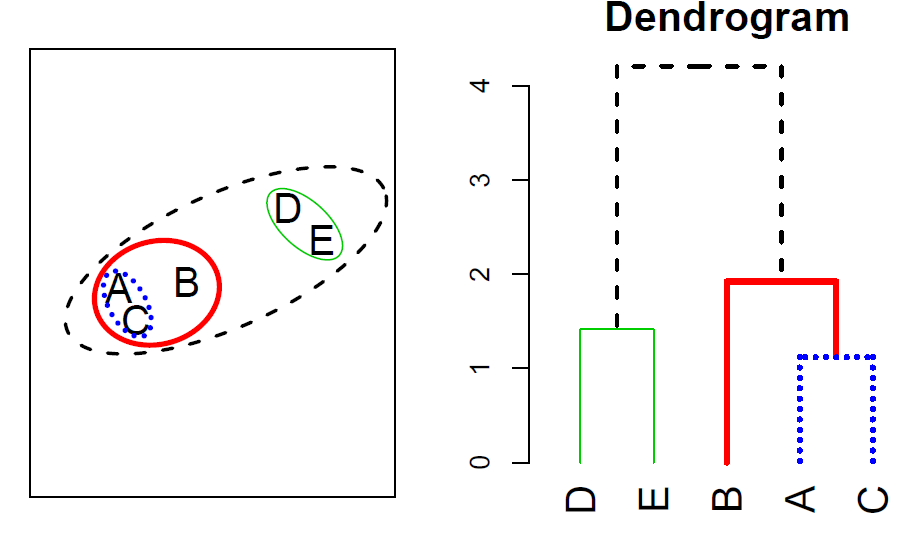

다음의 예제 그림을 보자. 비록 세 가지 색으로 구분되어 있지만 hierarchical clustering을 함에 있어 class label을 이용하지 않고 clustering을 진행한다.

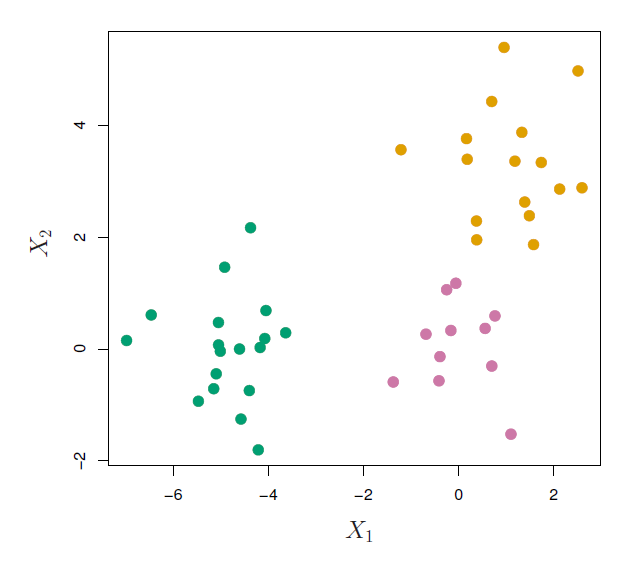

다음은 진행된 전체 clustering dendrogram을 바탕으로 1개, 2개, 3개의 클러스터로 구분할 수 있음을 보인다.

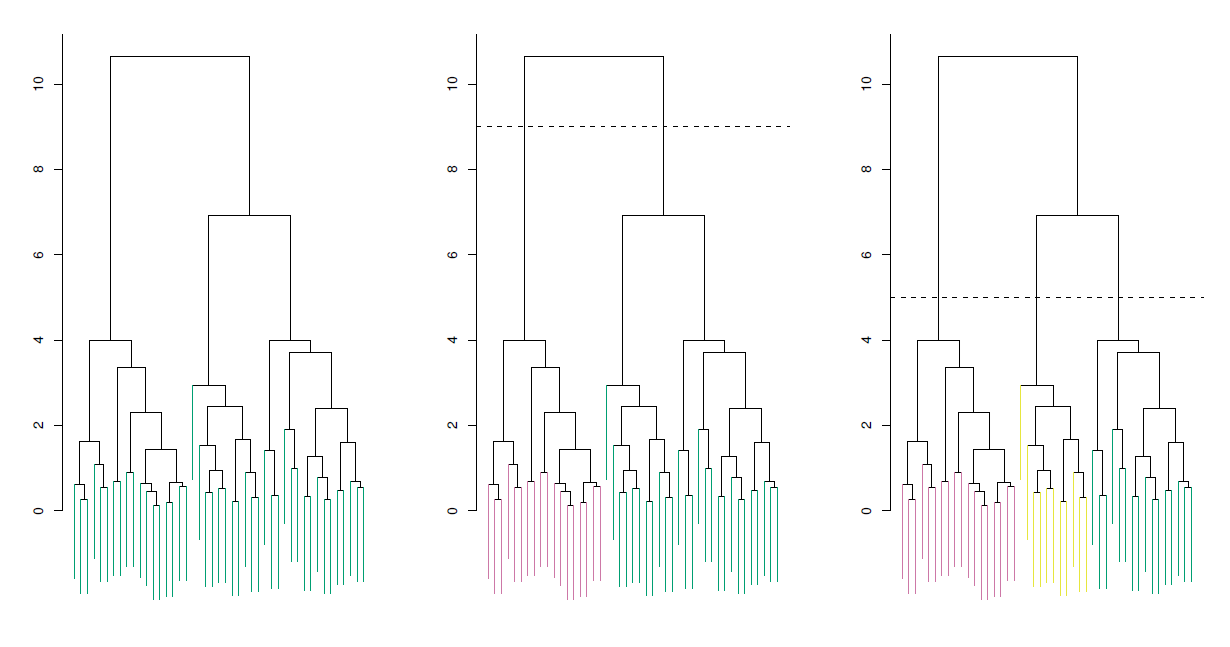

In [38]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(X)
clustering.labels_

array([0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0,
       0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1,
       0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0,
       0, 2], dtype=int64)

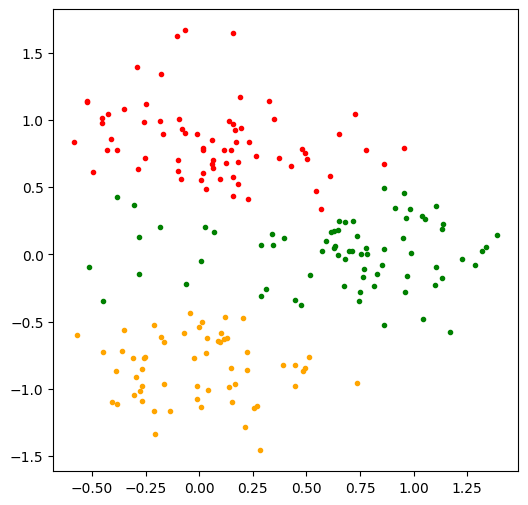

In [39]:
plt.figure(1, figsize=(6, 6))


plt.scatter(X[clustering.labels_==0, 0], X[clustering.labels_==0, 1], marker=".", color="green")
plt.scatter(X[clustering.labels_==1, 0], X[clustering.labels_==1, 1], marker=".", color="orange")
plt.scatter(X[clustering.labels_==2, 0], X[clustering.labels_==2, 1], marker=".", color="red")

plt.show()